In [ ]:
!pip install rdrobust==1.2.0
!pip install rddensity==2.4.1

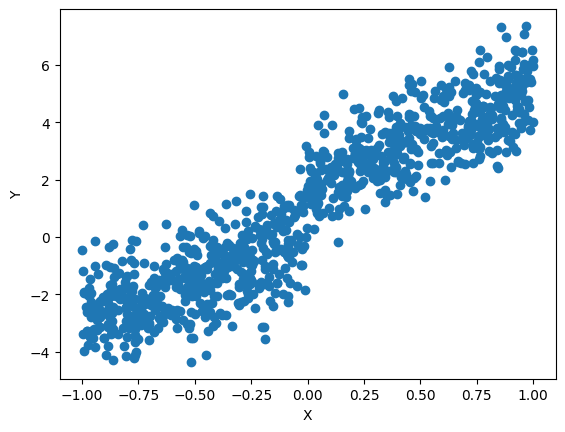

In [2]:
# ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rdrobust
import rddensity

# 再現性のためにランダムシードを設定
np.random.seed(0)

# サンプルデータを生成
n = 1000 # 観測データの数
X = np.random.uniform(-1, 1, size=n) # 強制変数
threshold = 0 # 処置のカットオフ値
treatment = (X > threshold).astype(int) # 処置の割当
Y = 3 * X + 2 * treatment + np.random.normal(size=n) # 結果変数

# データフレームの作成
df = pd.DataFrame({
    'Y': Y,
    'X': X,
    'treatment': treatment
})

# データの可視化
plt.scatter(df['X'], df['Y']) # 散布図の作成
plt.xlabel('X') # X軸のラベル
plt.ylabel('Y') # Y軸のラベル
plt.show() # グラフの表示

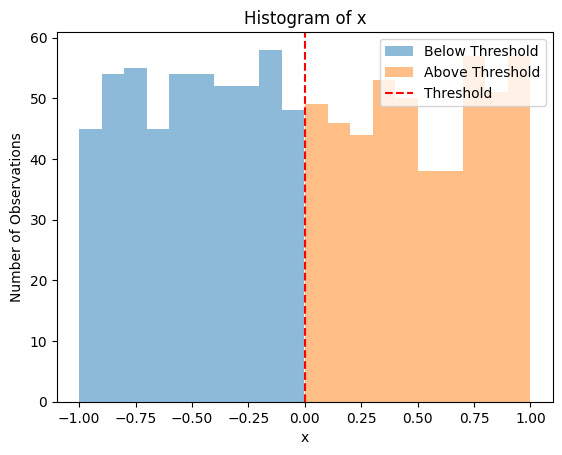

In [3]:
plt.hist(df[df['X'] < threshold]['X'], bins=10, alpha=0.5, label='Below Threshold')
plt.hist(df[df['X'] >= threshold]['X'], bins=10, alpha=0.5, label='Above Threshold')
plt.axvline(x=threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('x')
plt.ylabel('Number of Observations')
plt.title('Histogram of x')
plt.legend()
plt.show()

In [4]:
rddensity.rddensity(X, c=0)

Manipulation testing using local polynomial density estimation
Number of obs:                              1000
Model:                              unrestricted
Kernel:                               triangular
BW method:                             estimated
VCE:                                   jackknife

c = 0                               Left of c             Right of c
Number of obs:                            517                    483
Eff. number of obs:                       184                    153
Order est. (p):                             2                      2
Order bias. (q):                            3                      3
BW est.                                0.3446                 0.3336

Method:                                     T                P > |T|
Robust                                  0.963                 0.3356

P-values of binomial tests (H0: p =  [0.5] ).

Window Length/2                           < c                     >= c                    

In [5]:
rdrobust.rdrobust(Y, X, c=0)

Call: rdrobust
Number of Observations:                  1000
Polynomial Order Est. (p):                  1
Polynomial Order Bias (q):                  2
Kernel:                            Triangular
Bandwidth Selection:                    mserd
Var-Cov Estimator:                         NN

                                Left      Right
------------------------------------------------
Number of Observations           517        483
Number of Unique Obs.            517        483
Number of Effective Obs.         112         97
Bandwidth Estimation            0.21       0.21
Bandwidth Bias                 0.362      0.362
rho (h/b)                       0.58       0.58

Method             Coef.     S.E.   t-stat    P>|t|       95% CI      
-------------------------------------------------------------------------
Conventional       1.194    0.304    3.922   8.767e-05     [0.597, 1.791]
Robust                 -        -    3.091   1.994e-03     [0.403, 1.799]


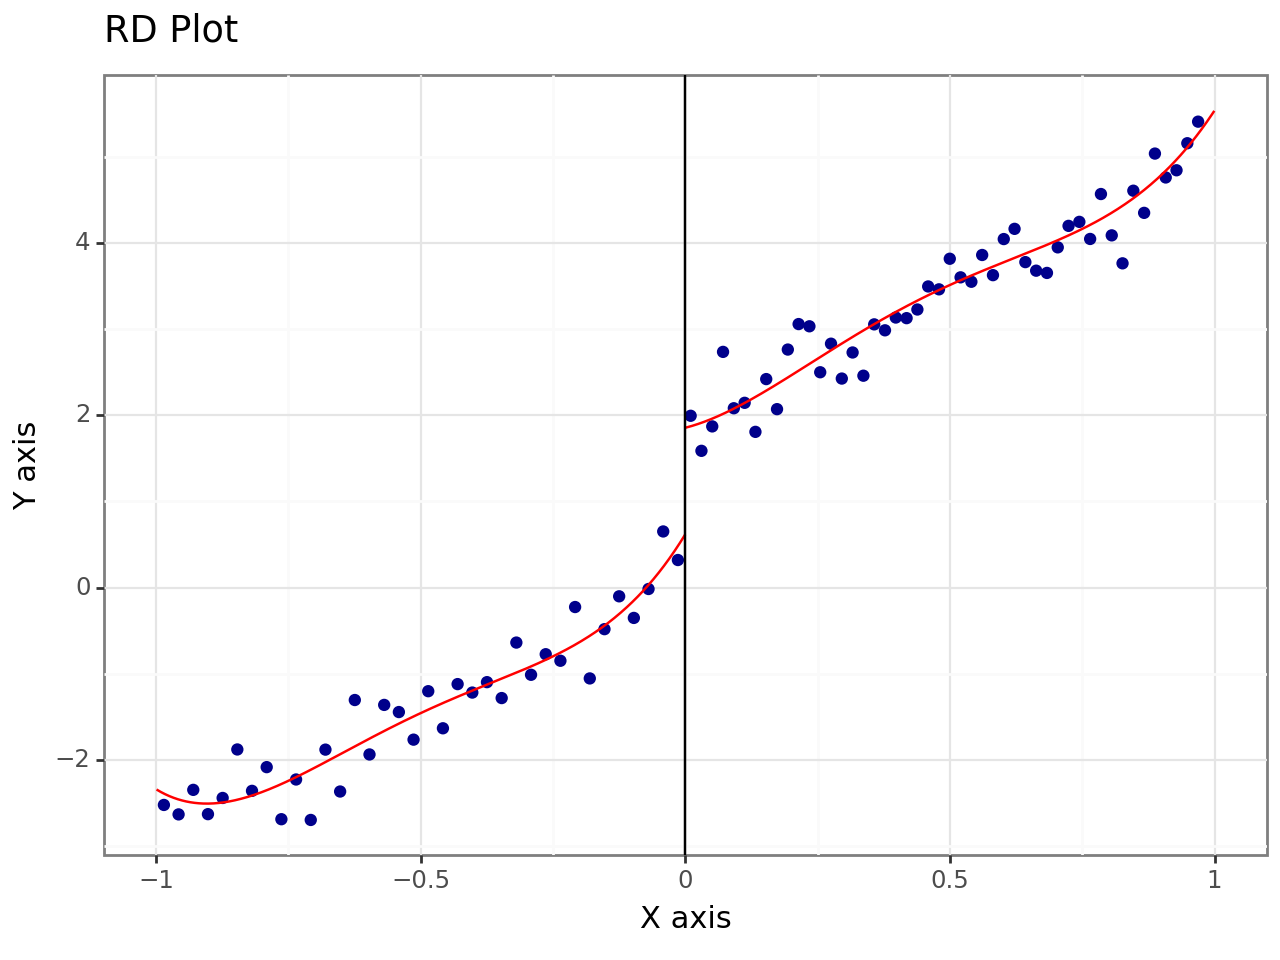

In [6]:
rdrobust.rdplot(Y, X, c=0)

In [7]:
#プラセボテスト
rdrobust.rdrobust(Y, X, c=0.5)


Call: rdplot
Number of Observations:                  1000
Kernel:                               Uniform
Polynomial Order Est. (p):                  4

                                Left      Right
------------------------------------------------
Number of Observations           517        483
Number of Effective Obs          517        483
Bandwith poly. fit (h)         0.999        1.0
Number of bins scale               1          1
Bins Selected                     36         49
Average Bin Length             0.028       0.02
Median Bin Length              0.028       0.02
IMSE-optimal bins               11.0       12.0
Mimicking Variance bins         36.0       49.0

Relative to IMSE-optimal:
Implied scale                  3.273      4.083
WIMSE variance weight          0.028      0.014
WIMSE bias weight              0.972      0.986
Call: rdrobust
Number of Observations:                  1000
Polynomial Order Est. (p):                  1
Polynomial Order Bias (q):              